결정트리

In [1]:
#p106
from sklearn.linear_model import LinearRegression, LogisticRegression # 예측용/분류용
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 분류용/예측용

In [13]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
#cancer = load_breast_cancer()
cancer= load_iris()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.9210526315789473)

In [15]:
#p108 트리 그림 그리기(파
일로 트리를 저장합니다.)
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=cancer.target_names, feature_names=cancer.feature_names, impurity=False, filled=True)

In [9]:
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
os.environ['PATH']

'C:\\Users\\wtime\\Anaconda3;C:\\Users\\wtime\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\usr\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\bin;C:\\Users\\wtime\\Anaconda3\\Scripts;C:\\Users\\wtime\\Anaconda3\\bin;C:\\Users\\wtime\\Anaconda3\\condabin;C:\\Users\\wtime\\Anaconda3;C:\\Users\\wtime\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\usr\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\bin;C:\\Users\\wtime\\Anaconda3\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files\\Git\\cmd;C:\\Users\\wtime\\AppData\\Local\\Microsoft\\WindowsApps;;C:\\Program Files (x86)\\Graphviz2.38\\bin\\;C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

In [16]:
import graphviz

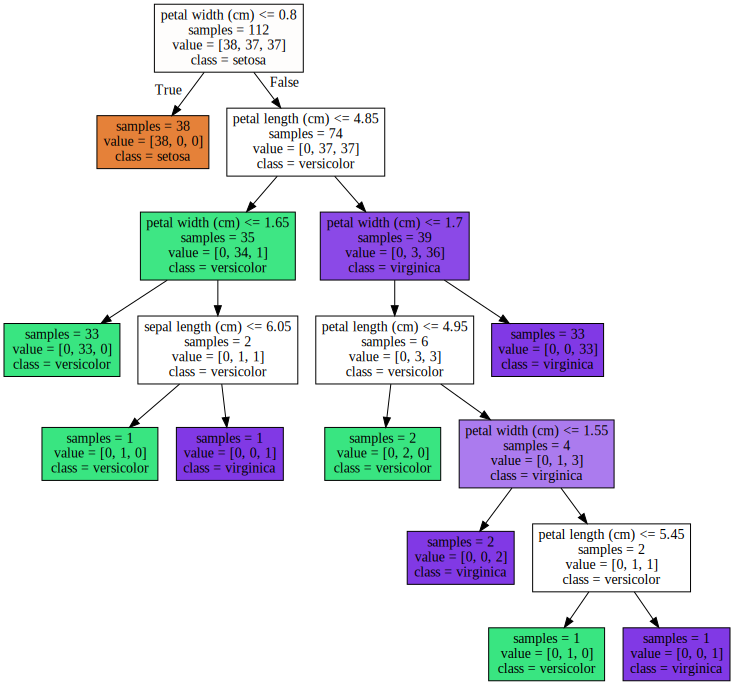

In [17]:
with open('tree.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [18]:
#one-hot-encoding
import pandas as pd

In [19]:
df = pd.DataFrame(data=[[1,2,'man'],[2,3,'woman']],columns=['a','b','c'])
df

,a,b,c
0,1,2,man
1,2,3,woman


In [21]:
df.dtypes

a     int64
b     int64
c    object
dtype: object

man은 1로, woman은 0으로 변환하며 안되요?
이유
- man + man = 2 ?
- man과 woman의 중간값은? (1+0)/2 = 0.5 ?


In [22]:
pd.get_dummies(df)

,a,b,c_man,c_woman
0,1,2,1,0
1,2,3,0,1


- 시간은 범주(o) / 연속 : 0~24시
  - 1시 < 2시, 24시 <? 1시
- 연도는 범주(o) / 연속 : 2000년, 2001년, 2000년은 1000년과 3000년의 중간
- 사람의 키 - 연속
- 사람의 나이 - 연속 (미성년자, 성년 구분시는 범주 , 목표에 따라서 구분)
